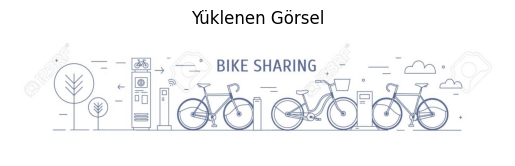

In [2]:
from PIL import Image
import matplotlib.pyplot as plt

# Resmi yükle
image_path = "/kaggle/input/imagepng/image1.jpg"
image = Image.open(image_path)

# Görüntüle
plt.imshow(image)
plt.axis('off')  # Eksenleri gizle
plt.title("Yüklenen Görsel")  # Başlık ekleyelim
plt.show()


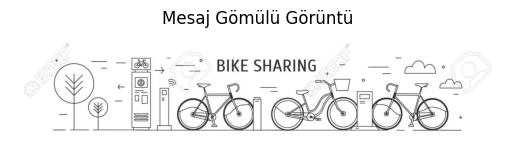

Gizli Mesaj: Bu gizli mesajdir
Çıkarılan Mesaj: Bu gizli mesajdir


In [4]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Mesajı bitlere dönüştür
def get_message_bits(message):
    return ''.join(format(ord(c), '08b') for c in message)

# Görüntüye mesaj gömme
def embed_heuristic(image, message):
    gray = np.array(image.convert("L"))
    message_bits = get_message_bits(message)
    msg_idx = 0
    h, w = gray.shape
    block_size = 8
    for i in range(0, h, block_size):
        for j in range(0, w, block_size):
            if msg_idx >= len(message_bits):
                break
            block = gray[i:i+block_size, j:j+block_size]
            if block.shape[0] != block_size or block.shape[1] != block_size:
                continue
            std = np.std(block)
            if std < 30:  # daha düz alanlara göm
                block[0, 0] = (block[0, 0] & ~1) | int(message_bits[msg_idx])
                msg_idx += 1
    return Image.fromarray(gray)

# Görüntüden mesaj çıkarma
def extract_heuristic(image, bit_count):
    gray = np.array(image.convert("L"))
    h, w = gray.shape
    block_size = 8
    extracted_bits = ""
    for i in range(0, h, block_size):
        for j in range(0, w, block_size):
            if len(extracted_bits) >= bit_count:
                break
            block = gray[i:i+block_size, j:j+block_size]
            if block.shape[0] != block_size or block.shape[1] != block_size:
                continue
            std = np.std(block)
            if std < 30:
                extracted_bits += str(block[0, 0] & 1)
    chars = [chr(int(extracted_bits[i:i+8], 2)) for i in range(0, bit_count, 8)]
    return ''.join(chars)

# 🖼️ Resmi yükle
image = Image.open(image_path)

# 🔐 Mesajı göm
message = "Bu gizli mesajdir"
stego_image = embed_heuristic(image, message)

# 🖼️ Görüntüle
plt.imshow(stego_image, cmap='gray')
plt.axis('off')
plt.title("Mesaj Gömülü Görüntü")  # Başlık ekleyelim
plt.show()

# 🧠 Mesajı çıkar
extracted = extract_heuristic(stego_image, bit_count=len(message)*8)
print("Gizli Mesaj:", message)
print("Çıkarılan Mesaj:", extracted)
